In [1]:
# 리눅스 명령어
! ls    # 현재 경로를 출력

drive  sample_data


In [2]:
# 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


In [3]:
!ls

'Class 1-samples'  'Class 2-samples'   student-mat.csv	 ThoraricSurgery.csv


In [4]:
from PIL import Image     # 이미지를 불러오게끔 해주는 모듈
import numpy as np        
import pandas as pd

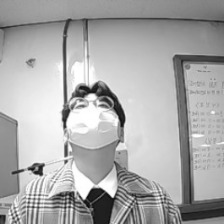

In [6]:
# 이미지를 가져와서 흑백으로 전환하는 코드
img = Image.open("./Class 1-samples/0.jpg").convert('L')
img

In [7]:
# numpy 배열로 변환 (기계가 인식할 수 있도록 숫자 데이터로 변환시키기)
img_array = np.array(img)   

In [8]:
img_array.shape

(224, 224)

In [9]:
from tqdm import tqdm   # 어느정도 실행 됬는지

In [12]:
# 데이터 셋 구성하기

class1_list = []
class2_list = []

for i in tqdm(range(0, 200, 1)) :
  img1 = Image.open("./Class 1-samples/"+ str(i) +".jpg").convert('L')
  img_array1 = np.array(img1)
  class1_list.append(img_array1)

  img2 = Image.open("./Class 2-samples/"+ str(i) +".jpg").convert('L')
  img_array2 = np.array(img2)
  class2_list.append(img_array2)



  0%|          | 0/200 [00:00<?, ?it/s]

 10%|█         | 21/200 [00:00<00:00, 207.19it/s]

 19%|█▉        | 38/200 [00:00<00:02, 72.07it/s] 

 22%|██▏       | 44/200 [00:05<00:42,  3.65it/s]

 24%|██▍       | 48/200 [00:09<01:09,  2.19it/s]

 26%|██▌       | 51/200 [00:12<01:32,  1.62it/s]

 26%|██▋       | 53/200 [00:13<01:34,  1.55it/s]

 28%|██▊       | 55/200 [00:15<01:49,  1.32it/s]

 28%|██▊       | 56/200 [00:16<02:01,  1.19it/s]

 28%|██▊       | 57/200 [00:18<02:21,  1.01it/s]

 29%|██▉       | 58/200 [00:19<02:29,  1.05s/it]

 30%|██▉       | 59/200 [00:20<02:41,  1.15s/it]

 30%|███       | 60/200 [00:22<02:48,  1.21s/it]

 30%|███       | 61/200 [00:23<02:46,  1.20s/it]

 31%|███       | 62/200 [00:24<02:39,  1.16s/it]

 32%|███▏      | 63/200 [00:25<02:40,  1.17s/it]

 32%|███▏      | 64/200 [00:27<02:48,  1.24s/it]

 32%|███▎      | 65/200 [00:28<02:54,  1.29s/it]

 33%|███▎      | 66/200 [00:29<02:41,  1.20s/it]

 34%|███▎      | 67/200 [00:30<02:37,  1.18s/it]

 34%|

In [13]:
# 리스트를 numpy배열로 변환 (사진 하나하나도 numpy 배열로, 이를 담고 있는 리스트도 변환을 시켜줘야 학습이 가능)

class1_numpy = np.array(class1_list)
class2_numpy = np.array(class2_list)
# concatenate : 두 배열을 순서대로 붙이기
data = np.concatenate((class1_numpy, class2_numpy))

In [14]:
data.shape    # 학습에 사용될 문제 데이터 셋

(400, 224, 224)

In [15]:
# 정답 데이터 만들기
target = np.array([0]*200 + [1]*200)    # 각 200개씩의 정답 데이터를 만들어 줌 (0:건, 1:희지)
target.shape

(400,)

### 건, 희지 이미지를 분류하는 2진분류 모델을 직접 만들어보자

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [20]:
# 랜덤 샘플링
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 224, 224)
(320,)
(80, 224, 224)
(80,)


In [30]:
# 1. 신경망 구조 설계
# 이미지에선 층 쌓는게 중요인자
model = Sequential()

# 입력층
model.add(Flatten(input_shape=(224,224))) # 신경망에서 1차원 데이터로 펴주기

# 중간층
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))

# 출력층
model.add(Dense(1, activation="sigmoid")) # 이진 분류는 출력 1 (0 or 1)

# summary() : 신경망의 층별, 전체 정보를 요약해서 표시
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1605664   
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,620,257
Trainable params: 1,620,257
Non-trainable params: 0
____________________________________________

In [31]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",   # Adam
              metrics=["acc"] # 분류 지표: 정확도
              )

In [32]:
h1 = model.fit(X_train, y_train, 
               validation_split = 0.2, # 자동으로 train데이터에서 검증데이터를 분리시켜주는 명령
               epochs=100)
# validation_split : 분리시켜줄때 뒤에서부터 20% 잘라줌, 일정한 값으로 정렬돼있는 데이터에는 사용 불가능

Epoch 1/100
8/8 [==============================] - 1s 48ms/step - loss: 556.7254 - acc: 0.5177 - val_loss: 74.4995 - val_acc: 0.4375
Epoch 2/100
8/8 [==============================] - 0s 24ms/step - loss: 155.9037 - acc: 0.5516 - val_loss: 96.9443 - val_acc: 0.5625
Epoch 3/100
8/8 [==============================] - 0s 25ms/step - loss: 58.5453 - acc: 0.6880 - val_loss: 28.1772 - val_acc: 0.7656
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 11.9948 - acc: 0.8736 - val_loss: 0.6852 - val_acc: 0.9844
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 7.7798 - acc: 0.9357 - val_loss: 3.0051 - val_acc: 0.9844
Epoch 6/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2300 - acc: 0.9922 - val_loss: 3.3294 - val_acc: 0.9375
Epoch 7/100
8/8 [==============================] - 0s 24ms/step - loss: 0.4443 - acc: 0.9907 - val_loss: 7.1767e-29 - val_acc: 1.0000
Epoch 8/100
8/8 [==============================] - 0s 28ms/step - loss: 0.488

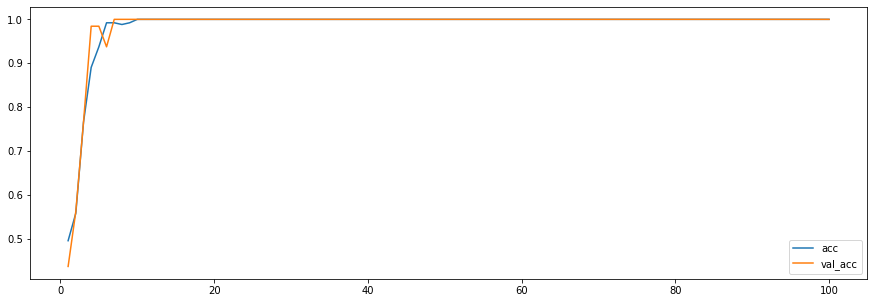

In [33]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101,1),
         h1.history['acc'],
         label = 'acc'
         )

plt.plot(range(1,101,1),
         h1.history['val_acc'],
         label = 'val_acc'
         )

plt.legend()
plt.show()

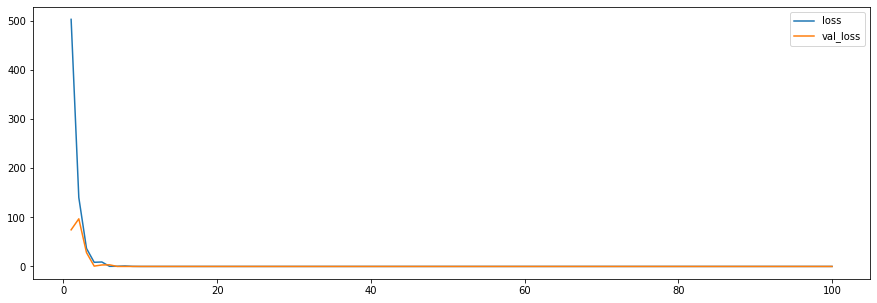

In [34]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101,1),
         h1.history['loss'],
         label = 'loss'
         )

plt.plot(range(1,101,1),
         h1.history['val_loss'],
         label = 'val_loss'
         )

plt.legend()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]